<h1>CNN Visual Examples</h1>

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a vali- dation set with 500 samples of each class, and a test set with 500 samples of each class.

In [1]:
import os, shutil

In [2]:
original_dataset_dir = './data/dogs-vs-cats/images'

In [4]:
base_dir = './data/dogs-vs-cats/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') 
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') 
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') 
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') 
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') 
#os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [12]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [13]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [14]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [15]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [16]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


2,000 training images, 1,000 validation images, and 1,000 test images. 2,000 training images, 1,000 validation images, and 1,000 test images


Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

<h2>Build a Model</h2>

In [20]:
from keras import layers
from keras import models

In [23]:
model = models.Sequential()

In [28]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

In [29]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [31]:
from keras import optimizers

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

<h3>Data Preproccessing</h3>

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has utilities to take care of these steps automatically.  ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. 

In [22]:
from keras.preprocessing.image import ImageDataGenerator

#Rescales all images by 1/255 Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process 
# (given a typical learning rate), so we target values between 0 and 1 
# instead by scaling with a 1/255.
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
#POINT TO DIR WITH TWO DIRECTORIES AS NAMES FOR CLASSIFICAION
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [54]:
validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [56]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [57]:
labels_batch

array([1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1.], dtype=float32)

In [58]:
# batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples. Validation 20 * 50


history = model.fit_generator( train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 44s 444ms/step - loss: 0.6897 - acc: 0.5280 - val_loss: 0.6919 - val_acc: 0.5490
Epoch 2/30
100/100 [==============================] - 46s 460ms/step - loss: 0.6565 - acc: 0.6180 - val_loss: 0.6449 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 46s 457ms/step - loss: 0.6185 - acc: 0.6675 - val_loss: 0.5879 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 45s 454ms/step - loss: 0.5696 - acc: 0.6955 - val_loss: 0.4932 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 45s 453ms/step - loss: 0.5395 - acc: 0.7220 - val_loss: 0.5188 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 43s 433ms/step - loss: 0.5116 - acc: 0.7425 - val_loss: 0.4437 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 45s 448ms/step - loss: 0.4843 - acc: 0.7645 - val_loss: 0.4070 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 4

In [60]:
#SAVE THE MODEL
model.save('./models/cats_and_dogs_small_1.h5')

<h2>Plot the Accuracy</h2>

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


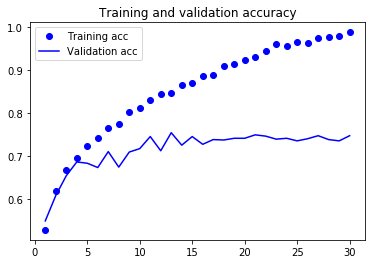

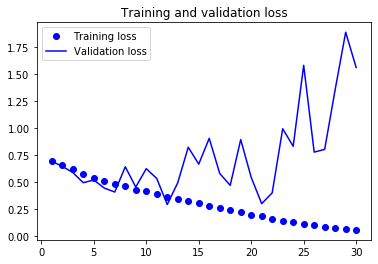

In [63]:
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')

plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

Training loss is the error on the training set of data. Validation loss is the error after running the validation set of data through the trained network. 

To combat overfitting, we will use  data augmentation.

The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

this can be done by configuring a number of random transformations to be performed on the images

In [64]:
datagen = ImageDataGenerator(
      rotation_range=40,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

In [19]:
from keras.preprocessing import image


Using TensorFlow backend.


In [66]:
fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

In [67]:
img_path = fnames[3]

In [68]:
img = image.load_img(img_path, target_size=(150, 150))

In [69]:
x = image.img_to_array(img)

In [70]:
x = x.reshape((1,) + x.shape)

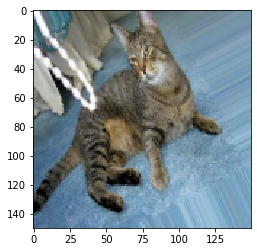

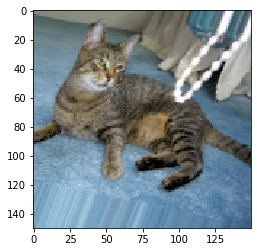

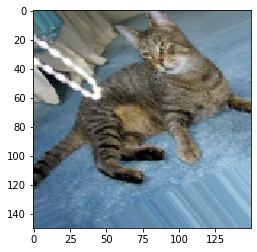

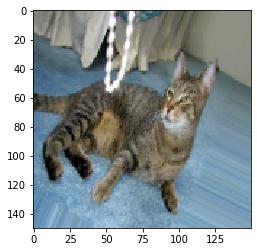

In [71]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1
    if i % 4 == 0:
        break

To further fight overfitting, you’ll also add a Dropout layer to your model, right before the densely connected classifier.

In [74]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [75]:
train_datagen = ImageDataGenerator( rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,)

In [77]:
#Validation should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)


In [78]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [79]:
validation_generator = test_datagen.flow_from_directory( 
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [80]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 69s 694ms/step - loss: 0.6921 - acc: 0.5211 - val_loss: 0.6423 - val_acc: 0.4956
Epoch 2/100
100/100 [==============================] - 69s 688ms/step - loss: 0.6808 - acc: 0.5581 - val_loss: 0.7547 - val_acc: 0.5322
Epoch 3/100
100/100 [==============================] - 69s 689ms/step - loss: 0.6682 - acc: 0.5773 - val_loss: 0.6953 - val_acc: 0.6142
Epoch 4/100
100/100 [==============================] - 69s 687ms/step - loss: 0.6530 - acc: 0.6127 - val_loss: 0.6543 - val_acc: 0.6302
Epoch 5/100
100/100 [==============================] - 68s 675ms/step - loss: 0.6360 - acc: 0.6291 - val_loss: 0.6589 - val_acc: 0.6872
Epoch 6/100
100/100 [==============================] - 68s 683ms/step - loss: 0.6126 - acc: 0.6580 - val_loss: 0.6780 - val_acc: 0.6366
Epoch 7/100
100/100 [==============================] - 68s 680ms/step - loss: 0.6059 - acc: 0.6664 - val_loss: 0.6704 - val_acc: 0.6707
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 68s 678ms/step - loss: 0.4164 - acc: 0.8084 - val_loss: 0.5125 - val_acc: 0.8125
Epoch 62/100
100/100 [==============================] - 67s 675ms/step - loss: 0.4127 - acc: 0.8119 - val_loss: 0.3796 - val_acc: 0.8020
Epoch 63/100
100/100 [==============================] - 67s 675ms/step - loss: 0.4194 - acc: 0.8050 - val_loss: 0.3356 - val_acc: 0.7687
Epoch 64/100
100/100 [==============================] - 67s 666ms/step - loss: 0.4157 - acc: 0.8141 - val_loss: 0.8291 - val_acc: 0.7816
Epoch 65/100
100/100 [==============================] - 68s 679ms/step - loss: 0.4072 - acc: 0.8160 - val_loss: 0.4178 - val_acc: 0.8001
Epoch 66/100
100/100 [==============================] - 67s 669ms/step - loss: 0.4095 - acc: 0.8084 - val_loss: 0.5612 - val_acc: 0.7899
Epoch 67/100
100/100 [==============================] - 67s 674ms/step - loss: 0.4056 - acc: 0.8163 - val_loss: 0.3787 - val_acc: 0.7919
Epoch 68/100
100/100 [===================

In [81]:
model.save('./models/cats_and_dogs_small_2.h5') #142

In [82]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

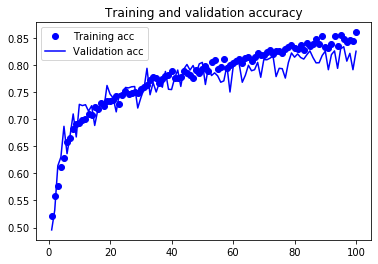

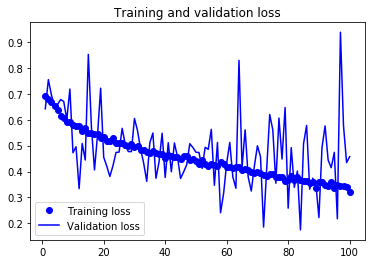

In [83]:
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [27]:
#from tensorflow import keras
#history = keras.models.load_model('./models/cats_and_dogs_small_2.h5')

In [28]:
history

<h2>Pretrained Network</h2>

There are two ways to use a pretrained network: feature extraction and fine-tuning.

<h3>Feature Extraction</h3>


Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

list of image-classification models (all pretrained on the ImageNet dataset) that are available as part of keras .applications:

Xception

Inception V3  

ResNet50

VGG16

VGG19

MobileNet

In [29]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                #refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet
                  include_top=False,
                  #optional: if you don’t pass it, the network will be able to process inputs of any size.
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll stick a densely connected classifier.

1 Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier.  This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image

2 Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model

Using the first technique:

1. Extracting features using the pretrained convolutional base:

In [31]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) 
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        
        if i * batch_size >= sample_count:
            #Note that because generators yield data indefinitely in a loop, you must break after every image has been seen once
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000) 
validation_features, validation_labels = extract_features(validation_dir, 1000) 
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
#The extracted features are currently of shape (samples, 4, 4, 512). 
#You’ll feed them to a densely connected classifier, so first you must flatten them to (samples, 8192):

train_features = np.reshape(train_features, (2000, 4 * 4 * 512)) 
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512)) 
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

2. Defining and training the densely connected classifier

In [33]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512)) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6001 - acc: 0.6700 - val_loss: 0.4475 - val_acc: 0.8230
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4231 - acc: 0.8105 - val_loss: 0.3633 - val_acc: 0.8680
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3556 - acc: 0.8430 - val_loss: 0.3214 - val_acc: 0.8890
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3108 - acc: 0.8725 - val_loss: 0.3016 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2840 - acc: 0.8800 - val_loss: 0.2853 - val_acc: 0.9010
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2611 - acc: 0.8965 - val_loss: 0.2795 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2489 - acc: 0.9005 - val_loss: 0.2635 - val_acc: 0.8990
Epoch 8/30
200

3. Test Accuracy

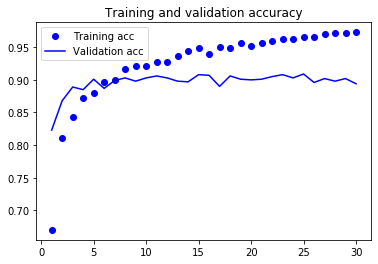

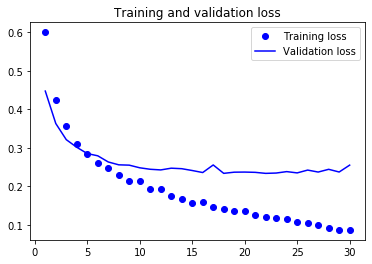

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

It's overfitting. data augmentation, which is essential for preventing overfitting with small image datasets. So we must try the second technique, FEATURE EXTRACTION WITH DATA AUGMENTATION. Note, you need a GPU for this.

In [36]:
from keras import models
from keras import layers

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


The convolutional base of VGG16 has 14,714,688 parameters, which is very large. The classifier you’re adding on top has 2 million parameters.

Before you compile and train the model, it’s very important to freeze the convolu- tional base. Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were pre- viously learned by the convolutional base will be modified during training. 

In [40]:
 print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30


In [41]:
conv_base.trainable = False

In [42]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
#Recompile the model!
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers

train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

#Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator( train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

<h3>Fine Tuning</h3>

consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers. T

In [ ]:
#Freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1': 
        set_trainable = True
if set_trainable: 
    layer.trainable = True
else:
    layer.trainable = False

Fine-tuning the model example


In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])
history = model.fit_generator( train_generator,
              steps_per_epoch=100,
              epochs=100,
              validation_data=validation_generator,
              validation_steps=50)

Evaluate the Model:

In [ ]:
test_generator = test_datagen.flow_from_directory( test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) print('test acc:', test_acc)


<h2>Visualizing what covnets learn</h2>

<h3>Visualizing intermediate activations</h3>

In [44]:
from keras.models import load_model

model = load_model('./models/cats_and_dogs_small_2.h5')
model.summary() #<1> As a reminder.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [48]:
#input image—a picture of a cat, not part of the images the network was trained on.
img_path = test_dir + '/cats/cat.1700.jpg'

from keras.preprocessing import image 
import numpy as np

#Remember that the model was trained on inputs that were preprocessed this way
img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

print(img_tensor.shape)


(1, 150, 150, 3)


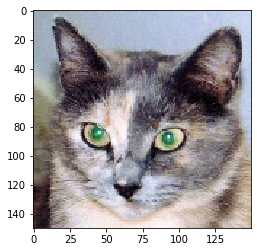

In [51]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0]) 
plt.show()

In [52]:
from keras import models

#Extracts the outputs of Creates a model that will return these the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]] 
#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [53]:
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [55]:
first_layer_activation = activations[]
print(first_layer_activation.shape)

(1, 148, 148, 32)


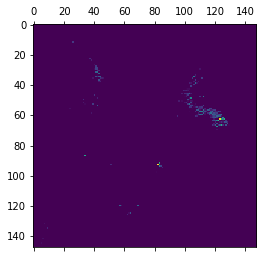

In [67]:
import matplotlib.pyplot as plt 
#Fourth channel of the activation of the first layer on the test cat picture
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


In [74]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] 
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, : col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
            #print (channel_image)
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    #scale = 1.
    #plt.figure(figsize=(scale * display_grid.shape[1],
    #scale * display_grid.shape[0])) 
    #plt.title(layer_name)
    #plt.grid(False)
    #plt.imshow(display_grid, aspect='auto', cmap='viridis')

[]


/Users/sgyoung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.


ValueError: could not broadcast input array from shape (148,0,32) into shape (148,148)

<h3>Visualizing convnet filters</h3>

In [76]:
#Defining the loss tensor for filter visualization
from keras.applications import VGG16 
from keras import backend as K
        
model = VGG16(weights='imagenet',
            include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output 
loss = K.mean(layer_output[:, :, :, filter_index])


In [77]:
#The call to gradients returns a list of tensors 
#(of size 1 in this case). Hence, you keep only the first element— which is a tensor.
grads = K.gradients(loss, model.input)[0]

In [78]:
#Add 1e–5 before dividing to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [80]:
#Fetching Numpy output values given Numpy input values

iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])


In [ ]:
#p168